## Cleaning image data

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


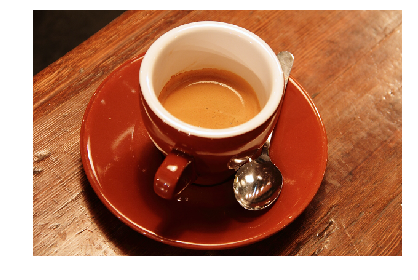

In [18]:
import skimage as skm
from skimage import data, io, segmentation
import matplotlib.pyplot as plt
image = data.coffee()
io.imshow(image)
plt.axis('off');

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


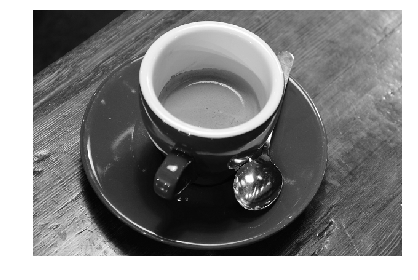

In [2]:
grey_image = skm.color.rgb2gray(image)
io.imshow(grey_image)
plt.axis('off');

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


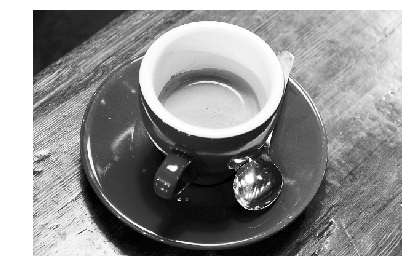

In [3]:
from skimage import exposure
image_equalized = exposure.equalize_hist(grey_image)
io.imshow(image_equalized)
plt.axis('off');

### Pixel distribution for the uncorrected image

(array([ 36002.,  19576.,  36769.,  34742.,  40715.,  29927.,  18761.,
         11167.,   4774.,   7567.]),
 array([  2.82745098e-04,   1.00254471e-01,   2.00226196e-01,
          3.00197922e-01,   4.00169647e-01,   5.00141373e-01,
          6.00113098e-01,   7.00084824e-01,   8.00056549e-01,
          9.00028275e-01,   1.00000000e+00]),
 <a list of 10 Patch objects>)

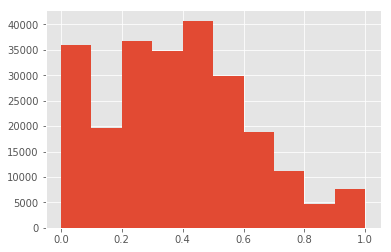

In [4]:
plt.style.use('ggplot')
plt.hist(grey_image.ravel())

### Plot the distribution of pixel intensities following normalization

(array([ 23515.,  24161.,  23337.,  24233.,  24069.,  23877.,  24075.,
         24229.,  24267.,  24237.]),
 array([  1.25000000e-05,   1.00011250e-01,   2.00010000e-01,
          3.00008750e-01,   4.00007500e-01,   5.00006250e-01,
          6.00005000e-01,   7.00003750e-01,   8.00002500e-01,
          9.00001250e-01,   1.00000000e+00]),
 <a list of 10 Patch objects>)

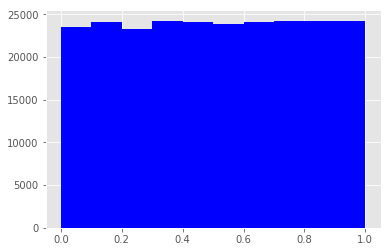

In [5]:
plt.hist(image_equalized.ravel(),color='b')

### Thresholding images to highlight objects

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


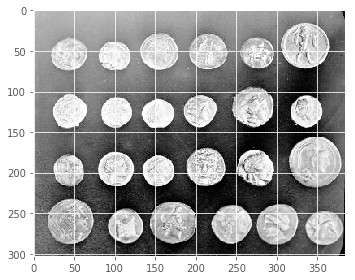

In [6]:
coins_equalized = exposure.equalize_hist(skm.color.rgb2gray(data.coins()))
io.imshow(coins_equalized)

#### Subtract the background which sequentially erodes and then dilates 

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


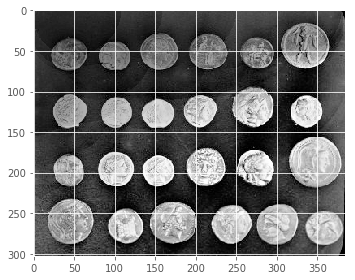

In [7]:
from skimage.morphology import opening, disk
d=disk(50)
background = opening(coins_equalized,d)
io.imshow(coins_equalized-background) 

### Apply the Otsu thresholding algorithm to find the ideal pixel to separate the image into background and object

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


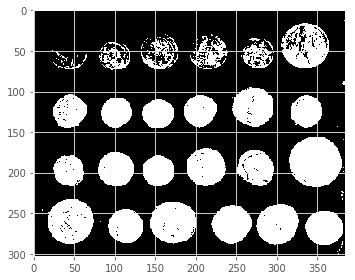

In [8]:
from skimage import filters
threshold_global_otsu = filters.threshold_otsu(coins_equalized-background)
global_otsu = (coins_equalized-background) >= threshold_global_otsu
io.imshow(global_otsu)

## Dimensionality reduction for image analysis

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


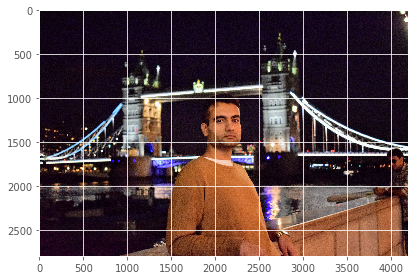

In [9]:
faces = skm.io.imread_collection('E:/Images/tttt/DSC_0719.jpg')
io.imshow(faces[0])

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


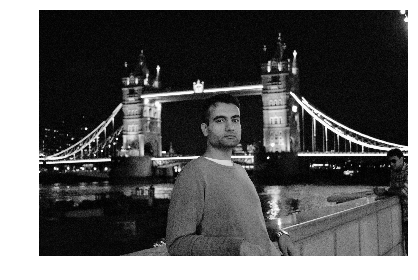

In [10]:
grey_image1 = skm.color.rgb2gray(faces[0])
io.imshow(grey_image1)
plt.axis('off');

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


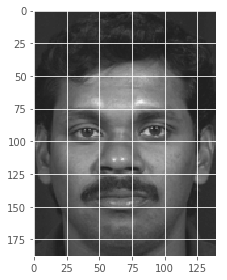

In [11]:
faces = skm.io.imread_collection("E:/O'Reilly - Advance predictive analytics/senthil_database_version1/S1/*.tif")
io.imshow(faces[1])

### Convert it into a vector
##### Construct a set where the average pixel intensity across faces has been subtracted from each pixel, yielding each face as an offset from the average face in the data

In [12]:
faces_flatten = [f.ravel() for f in faces]
import pylab
faces_flatten_demean = pylab.demean(faces_flatten,axis=1)

#### Use PCA to extract the major vectors of variation in the picture

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


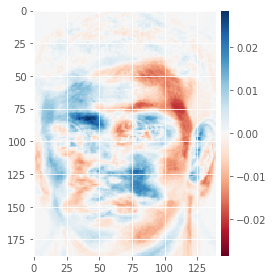

In [14]:
import numpy as np
from sklearn.decomposition import PCA
faces_components = PCA(n_components=3).fit(faces_flatten_demean)
io.imshow(np.reshape(faces_components.components_[1],(188,140)))

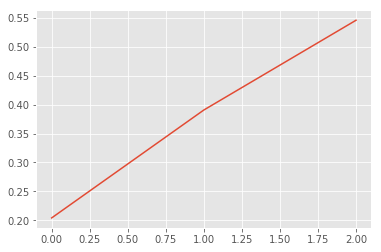

In [15]:
plt.plot(faces_components.explained_variance_ratio_.cumsum())